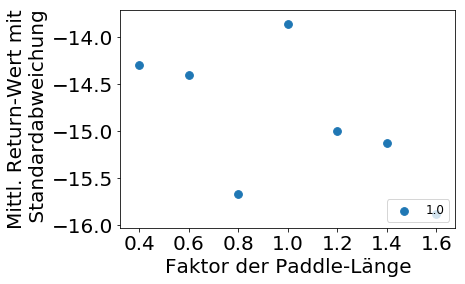

No handles with labels found to put in legend.


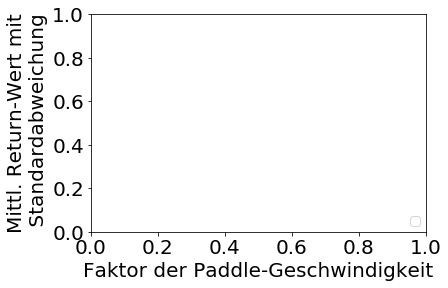

No handles with labels found to put in legend.


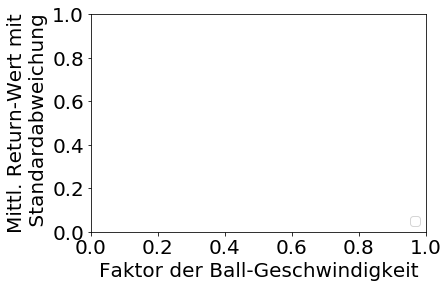

In [16]:
import matplotlib.pyplot as plt
import csv, numpy as np
import sys, argparse, os

class JuPong2D_PPO2_Plot:
    def __init__(self):
        self.env_name = "jupong2d-headless-0.4-v3"
        self.output = f"results/{self.env_name}" 
        self.folders = [f.path for f in os.scandir(self.output) if f.is_dir() and not f.name.startswith(".")]
    
    
    def plot_ball_speed(self):
        bs_folders = [folder for folder in self.folders if folder.split("/")[-1].split("_")[-2] == "BallSpeed"]

        fig = plt.figure()
        for bs_folder in bs_folders:
            bs_factor = float(bs_folder.split("_")[-1])
            reward_matrix = []
            scale_factor_matrix = []
            bs_sessions = [f.path for f in os.scandir(bs_folder) if f.is_dir() and f.name.startswith("session")]
            for bs_session in bs_sessions:
                for bs_file in os.listdir(bs_session):
                    if bs_file.endswith(".csv") and bs_file.startswith("ball_speed"):
                        with open(f"{bs_session}/{bs_file}") as csv_file:
                            rewards = []
                            scale_factors = []
                            csv_reader = list(csv.reader(csv_file, delimiter=','))
                            for i, reward in enumerate(csv_reader[1]):
                                rewards.append(np.round(float(reward), 2))
                                scale_factors.append(float(csv_reader[0][i]))
                            reward_matrix.append(rewards)
                            scale_factor_matrix.append(scale_factors)
                        break
            mean_rewards = np.mean(reward_matrix, axis = 0)
            std_vals = np.std(reward_matrix, axis = 0)
            scale_factors = np.mean(scale_factor_matrix, axis=0)
            std_rewards_up = mean_rewards + std_vals
            std_rewards_down = mean_rewards - std_vals
            plt.vlines(scale_factors, std_rewards_down, std_rewards_up, zorder = -1, linestyle="dashed")
            plt.scatter(scale_factors, mean_rewards, label = bs_factor, s = 60)
        plt.xlabel("Faktor der Ball-Geschwindigkeit", fontsize=20)
        plt.ylabel("Mittl. Return-Wert mit\n Standardabweichung", fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(loc = "lower right", fontsize=12)
        fig.savefig(f"{self.output}/ball_speed.pdf", format="pdf", bbox_inches='tight', dpi=800, pad_inches=0.1)
        plt.show()
        
        
    def plot_paddle_length(self):
        pl_folders = [folder for folder in self.folders if folder.split("/")[-1].split("_")[-2] == "PaddleLength"]

        fig = plt.figure()
        for pl_folder in pl_folders:
            pl_factor = float(pl_folder.split("_")[-1])
            reward_matrix = []
            scale_factor_matrix = []
            pl_sessions = [f.path for f in os.scandir(pl_folder) if f.is_dir() and f.name.startswith("session")]
            for pl_session in pl_sessions:
                for pl_file in os.listdir(pl_session):
                    if pl_file.endswith(".csv") and pl_file.startswith("paddle_length"):
                        with open(f"{pl_session}/{pl_file}") as csv_file:
                            rewards = []
                            scale_factors = []
                            csv_reader = list(csv.reader(csv_file, delimiter=','))
                            for i, reward in enumerate(csv_reader[1]):
                                rewards.append(np.round(float(reward), 2))
                                scale_factors.append(float(csv_reader[0][i]))
                            reward_matrix.append(rewards)
                            scale_factor_matrix.append(scale_factors)
                        break
            mean_rewards = np.mean(reward_matrix, axis = 0)
            std_vals = np.std(reward_matrix, axis = 0)
            scale_factors = np.mean(scale_factor_matrix, axis=0)
            std_rewards_up = mean_rewards + std_vals
            std_rewards_down = mean_rewards - std_vals
            plt.vlines(scale_factors, std_rewards_down, std_rewards_up, zorder = -1, linestyle="dashed")
            plt.scatter(scale_factors, mean_rewards, label = pl_factor, s = 60)
        plt.xlabel("Faktor der Paddle-Länge", fontsize=20)
        plt.ylabel("Mittl. Return-Wert mit\n Standardabweichung", fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(loc = "lower right", fontsize=12)
        fig.savefig(f"{self.output}/paddle_length.pdf", format="pdf", bbox_inches='tight', dpi=800, pad_inches=0.1)
        plt.show()  
        
        
    def plot_paddle_speed(self):
        ps_folders = [folder for folder in self.folders if folder.split("/")[-1].split("_")[-2] == "PaddleSpeed"]

        fig = plt.figure()
        for ps_folder in ps_folders:
            ps_factor = float(ps_folder.split("_")[-1])
            reward_matrix = []
            scale_factor_matrix = []
            ps_sessions = [f.path for f in os.scandir(ps_folder) if f.is_dir() and f.name.startswith("session")]
            for ps_session in ps_sessions:
                for ps_file in os.listdir(ps_session):
                    if ps_file.endswith(".csv") and ps_file.startswith("paddle_speed"):
                        with open(f"{ps_session}/{ps_file}") as csv_file:
                            rewards = []
                            scale_factors = []
                            csv_reader = list(csv.reader(csv_file, delimiter=','))
                            for i, reward in enumerate(csv_reader[1]):
                                rewards.append(np.round(float(reward), 2))
                                scale_factors.append(float(csv_reader[0][i]))
                            reward_matrix.append(rewards)
                            scale_factor_matrix.append(scale_factors)
                        break
            mean_rewards = np.mean(reward_matrix, axis = 0)
            std_vals = np.std(reward_matrix, axis = 0)
            scale_factors = np.mean(scale_factor_matrix, axis=0)
            std_rewards_up = mean_rewards + std_vals
            std_rewards_down = mean_rewards - std_vals
            plt.vlines(scale_factors, std_rewards_down, std_rewards_up, zorder = -1, linestyle="dashed")
            plt.scatter(scale_factors, mean_rewards, label = ps_factor, s = 60)
        plt.xlabel("Faktor der Paddle-Geschwindigkeit", fontsize=20)
        plt.ylabel("Mittl. Return-Wert mit\n Standardabweichung", fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(loc = "lower right", fontsize=12)
        fig.savefig(f"{self.output}/paddle_speed.pdf", format="pdf", bbox_inches='tight', dpi=800, pad_inches=0.1)
        plt.show()

ploter = JuPong2D_PPO2_Plot()
ploter.plot_paddle_length()
ploter.plot_paddle_speed()
ploter.plot_ball_speed()